Recommendation System

#Context
Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

#Attribute Information
->userId    : Every user identified with a unique id
->productId : Every product identified with a unique id
->Rating    : Rating of the corresponding product by the corresponding user
->timestamp : Time of the rating

#Objective
Build a recommendation system to recommend products to customers based on the their previous ratings for other products.

In [61]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

In [62]:
#Load the csv file and make the dataframe and the csv file does not contain column headers so we have to add column headers.
col_names = ['userId','productId','rating','timestamp']
rating_elect_df = pd.read_csv('ratings_Electronics.csv',names=col_names)

In [63]:
#display the first 5 rows of dataframe
rating_elect_df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [64]:
#display the last 5 rows of dataframe
rating_elect_df.tail()

,userId,productId,rating,timestamp
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [65]:
#display the rows and columns of dataframe
print("The dataframe has {} rows and {} columns".format(rating_elect_df.shape[0],rating_elect_df.shape[1]))

The dataframe has 7824482 rows and 4 columns


In [66]:
#display the information of dataframe
rating_elect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


So from above we can see that except rating column all are object type and rating is float type

In [67]:
#display unique ratings given by the user
rating_elect_df['rating'].unique()

array([5., 1., 3., 2., 4.])

So from above we can see that we have 5 rated products as well as 1 rated products

In [68]:
#display count of each rating
rating_elect_df['rating'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: rating, dtype: int64

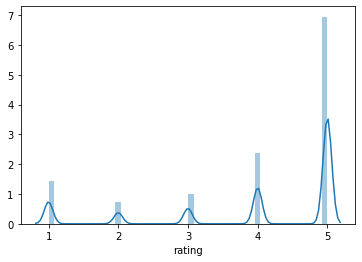

In [69]:
sns.distplot(rating_elect_df['rating'])
plt.show()

So from above we can see that 5 star rating is most and 2 star rating is least

In [70]:
#display how many times each user gives a rating
rating_elect_df['userId'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A20WA4YUNEK84I      1
A2TOZ58QJ4QRN7      1
A160KUQH8P47JN      1
AHXUK2FPLR6AJ       1
A22WRZYF600MUX      1
Name: userId, Length: 4201696, dtype: int64

So from above we can see that there is a user who gives rating 520 times for some products and there are also some user who give rating only for 1 time only

In [71]:
#display how many times each product receives a rating
rating_elect_df['productId'].value_counts()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B007C4ZQP6        1
B00FM8HWYC        1
B003U9WRTA        1
B00AB64P2C        1
B00EWZN1ZK        1
Name: productId, Length: 476002, dtype: int64

So from above we can see that there is a product who receives rating 18244 times and there are also some products who receives rating only 1 time.

So from above we can see that there are some users who give rating 1 time only. so we will take only those users who give rating atleast 50 times rest users we will ignore. we are doing so to make it less sparse.

In [72]:
counts1 = rating_elect_df['userId'].value_counts()

In [73]:
new_rating_df = rating_elect_df[rating_elect_df['userId'].isin(counts1[counts1 >= 50].index)]

In [74]:
new_rating_df

,userId,productId,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
...,...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1405209600
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600


In [75]:
#display the shape of new_rating_df dataframe
new_rating_df.shape

(125871, 4)

so from above we can see that there are 125871 users who gives rating 50 times or more.

In [76]:
#we will drop timestamp column because we are not using this 
new_rating_df.drop('timestamp',axis=1,inplace=True)

C:\Users\Rajan\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
new_rating_df

,userId,productId,rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [78]:
#display 5 point summary of new_rating_df
new_rating_df.describe()

,rating
count,125871.000000
mean,4.261339
std,1.062144
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


So from above we can see that mean rating is 4.26 with standard deviation of 1.06 and min and max rating is 1 and 5 respectively. 

#Popularity Based Recommendation System

Popularity based recommendation system works by recommending items viewed/purchased by most people and rated high.

But pure form of popularity based recommendation system consider only mean rating and after calculating mean rating we will sort in descending order and recommended top order products.
But it is not a good idea because suppose there is a item which is rated high by only one user and when we calculate mean rating it will also come very high and there is a item which is rated by 1000 user and it's mean rating is not as high than earlier item which is rated by only one user.so pure form of popularity based recommendation system recommend high rated product it will not consider how many users rated that product.
So pure form of popularity based recommendation system consider only mean rating it will not consider how many user rated and not consider other criteria also.

In [79]:
#display the first 5 rows of newly created dataframe
new_rating_df.head()

,userId,productId,rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [80]:
#calculate the mean rating of each product
new_rating_df.groupby('productId')['rating'].mean().head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: rating, dtype: float64

So from above we can see that we calculated mean rating of each product.

In [81]:
#calculate how many users rated each particular product
new_rating_df.groupby('productId')['rating'].count().head()

productId
0594451647    1
0594481813    1
0970407998    2
0972683275    4
1400501466    6
Name: rating, dtype: int64

So now we will create new dataframe which contain mean rating and count how many users rate that particular product

In [82]:
ratings_mean_count = pd.DataFrame(new_rating_df.groupby('productId')['rating'].mean())

In [83]:
ratings_mean_count['ratings_counts'] = pd.DataFrame(new_rating_df.groupby('productId')['rating'].count())

In [84]:
#display the dataframe
ratings_mean_count

,rating,ratings_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6
...,...,...
B00LED02VY,4.000000,1
B00LGN7Y3G,5.000000,1
B00LGQ6HL8,5.000000,5


So from above we can see that mean rating of each product and count of how many users rated that product.Now in popularity based recommendation system we recommend top rated products so we will sort the products based on rating and recommend top rated products.But point to remember that pure form of popularity based recommendation system take into consideration only mean rating it will not consider other criteria(how many users rated that product).

In [85]:
#display the products which have high rating
ratings_mean_count[ratings_mean_count['rating']==5]

,rating,ratings_counts
productId,,
0594451647,5.0,1
1400501520,5.0,1
1400699169,5.0,1
1685560148,5.0,1
3744295508,5.0,1
...,...,...
B00L8I6SFY,5.0,2
B00L8QCVL6,5.0,1
B00LGN7Y3G,5.0,1


so from above we can see that we have many 5 rated products. so in pure form of popularity based recommendation system we recommend only high rated products based on their mean rating. but if we want to consider some other criteria also to recommend products along with mean rating then we are deviating from pure form of popularity based recommendation system.so it's all depends on our needs but we want to recommend to our users.

#User-User Collaborative filtering

In User-User Collaborative Filtering we will search similar users who have same taste or interest with our user. suppose there is a user1 who rated some product very high and there is another user2 who also rated high same product so these two user are similar we can measure similarity by cosine similarity or pearson similarity or we can use any other similarity measure. so we can recommend products to user1 which user1 did not see while user2 already saw and vice-versa.

In [86]:
#import the necessary libraries
from surprise import KNNWithMeans
from surprise import Dataset,Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

First we will create new dataframe called new_coll_df and copy the new_rating_df into it.

In [87]:
#create a new_coll_df dataframe
new_coll_df = new_rating_df.copy()

In [88]:
#load the data from pandas dataframe to surprise format dataframe and split the datset into train and test in 70:30 ratio
reader =Reader()
data = Dataset.load_from_df(new_coll_df,reader)
trainset, testset = train_test_split(data, test_size=.30,random_state=1)

In [89]:
#instantiate the object and k =50 means we want 50 similar neighbours/users 
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [90]:
#predict the rating on test datset
test_pred = algo.test(testset)

In [91]:
#display the 10 prediction
test_pred[:10]

[Prediction(uid='A3PDWA32BAMB2Y', iid='B00CGW74YU', r_ui=5.0, est=4.385964912280702, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A31BD4RXCON7QO', iid='B000P6G7YW', r_ui=1.0, est=4.259735100841004, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3J8A5L5AF5TX9', iid='B001GS8G06', r_ui=1.0, est=3.935483870967742, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3D6OI36USYOU1', iid='B000A1790S', r_ui=5.0, est=4.259735100841004, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3JU16JTNLVK1J', iid='B002CX16WO', r_ui=2.0, est=4.259735100841004, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1ZU55TM45Y2R8', iid='B00HFAEBWG', r_ui=3.0, est=3.095333878188614, details={'actual_k': 13, 'was_impossible': False}),
 Prediction(uid='AYP0YPLSP9ISM', iid='B006Z0Q2SI', r_ui=3.0, est=3.55, details={'actual_k': 0, 'was_impossib

So from above we can see prediction of rating on test dataset.so now we have predicted rating as well as desired rating. so we can compute rmse to check how good are prediction is.

#RMSE

In [92]:
print("Root mean square error on testdataset::",accuracy.rmse(test_pred))

RMSE: 1.0551
Root mean square error on testdataset:: 1.0551024899101666


So now we have predicted rating but our task is to recommend five products for every user in test dataset. so for that we will create function and extract the five recommend product for every user.

In [93]:
from collections import defaultdict

In [94]:
def get_top_n(test_pred, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [95]:
top_n = get_top_n(test_pred, n=5)

In [96]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3PDWA32BAMB2Y ['B004W2JKWG', 'B00CGW74YU', 'B000Q8UAWY', 'B003TXZCYE', 'B008DW95NA']
A31BD4RXCON7QO ['B000FVGM38', 'B000P6G7YW', 'B00000JX3C', 'B000GC2DDE', 'B001P817YY']
A3J8A5L5AF5TX9 ['B003LZ6F8M', 'B005S0BYQ6', 'B002G1YNQS', 'B001W28L2Y', 'B007BJHETS']
A3D6OI36USYOU1 ['B0009ST7DY', 'B003ES5ZUU', 'B0038M3YM8', 'B0035ERKYW', 'B001SJVU24']
A3JU16JTNLVK1J ['B004HR0M4Q', 'B002CX16WO', 'B004BUVAS6', 'B000B7670E', 'B001D5FTE8']
A1ZU55TM45Y2R8 ['B008OEHPKM', 'B00IVPU5BK', 'B0017H4G0A', 'B004SD1XB0', 'B00006B81E']
AYP0YPLSP9ISM ['B00B46XUQU', 'B0053NBLFW', 'B001HTE414', 'B004JWBQ4Y', 'B00BEW8MVC']
A3UR2N0ATGBCU8 ['B005B3VO24', 'B001AAK0P4', 'B002R06PGE', 'B00B9996LA', 'B0095VPBM2']
A1PM7HH4F77NEH ['B003XM1WE0', 'B003D3MFHM', 'B00GIAOB10', 'B005T4TCJW', 'B0033039BG']
A1SFPA80X7TRBR ['B0041Q38NU', 'B001U3Y6AQ', 'B0002LEMWE', 'B000QUUFRW', 'B001FXZTIY']
A1AZQCVCDBQP6 ['B00FEE7B1I', 'B005B5G4S6', 'B000WH6H1M', 'B0057UUB1G', 'B00E055H5O']
A2DF62DP20RIXF ['B002SZEOLG', 'B002Y6CJJ8', 'B004OX4HWG'

A2EHYCA29NSQLU ['B002R0DZWG', 'B008MEISCS', 'B000QW4IS2', 'B0026IADEC', 'B003ID3T04']
A20VG5W98SX99L ['B008OIYDM6', 'B0001VWHT0', 'B002LLJJAS', 'B000N99BBC', 'B0046SQ8VW']
A37IRE9GZ0CZ7I ['B0097BEFYA', 'B000B75RDW', 'B00E055H5O', 'B005DKZTMG', 'B001UEBN42']
A31N0XY2UTB25C ['B0034KO59U', 'B005J6SCPK', 'B003L18RZU', 'B001O4EPHA', 'B000067SOH']
A26KXNN6H1IL0I ['B008OEHPKM', 'B005X64OQ2', 'B0096JZRBI', 'B0082N9BZM', 'B00IVPU6AA']
A2NOIWPJDD7WIQ ['B00004ZCPG', 'B002K3Z3HA', 'B00685ZCZY', 'B00DVFLJDS', 'B00DB3SH2G']
A87CILADRIZW0 ['B009SQQF9C', 'B004RORMF6', 'B003SQ1JTY', 'B008LURQ76', 'B000Q8UAWY']
A38NHXL5257E3B ['B003SGCO3E', 'B00GMGDFPI', 'B00A35WYBA', 'B0081FLFQE', 'B008THTWIW']
A3GQY0TFRG0MPZ ['B0015DYMVO', 'B004W2T2TM', 'B001XURP7W', 'B00622AG6S', 'B000BZATW8']
A33152QEGO2MZN ['B0002L5R78', 'B001EAQTRI', 'B008AST7R6', 'B005FMLXW2', 'B00575RN62']
A2LXX47A0KMJVX ['B002WE6D44', 'B0032UWTQI', 'B00DS5QZRQ', 'B001EYC5XQ', 'B00030BDWQ']
A316XO4RWX21YN ['B005IHAIJ8', 'B001QFZMCO', 'B00FPKDPZC

ADHA1W879JNT0 ['B00029U0X6', 'B00747N5ZE', 'B00AE256BW', 'B00BBXWX9Q', 'B0047WLZK6']
A2SKEQT0WTB954 ['B009YE462G', 'B006U1YUZE', 'B00009RUCH', 'B00006IRR8', 'B007LOLVLU']
A341HCMGNZCBIT ['B00BWV53UI', 'B008R7EVE4', 'B0011ZCDKS', 'B0006TIEZS', 'B000LRMS66']
A291XTI6NO7DEG ['B000EMWBT2', 'B000N254LU', 'B0000A2QBP', 'B0064YWOQY', 'B0010Z28XG']
A3LDLV1GWQJLEQ ['B00EOE4G4E', 'B004R929AY', 'B00829TIEK', 'B007PTCFFW', 'B0088CJT4U']
A11OTLEDSW8ZXD ['B0064P5I1G', 'B0063705PE', 'B0011ZCDKS', 'B0082E9K7U', 'B00CDS9HTM']
A2MCRCK1V61FWQ ['B002XMP7K6', 'B008RF7I5K', 'B0000512E1', 'B0014TXMOC', 'B000184N4A']
A1REY92IEZJUSX ['B0002E3WKO', 'B0018BTPLK', 'B004R6NSQG', 'B00A35WYBA', 'B003TYDBYQ']
A2NT3W1F1XYBFZ ['B002LITT3I', 'B00APCMMDG', 'B0016120M8', 'B0042GHI8U', 'B00CFCTDD6']
A3VBXQKRM7A4JR ['B005KELR3A', 'B00HMREOLK', 'B004CLYEH8', 'B009HNK272', 'B001C3GQP2']
A33XMCG1UFDSY2 ['B001FA1NK0', 'B001DZJVO2', 'B0090J652Y', 'B007HJI6KS', 'B0014Z29OU']
AD0J5KK4WQXNS ['B0001A06GW', 'B000TXEE14', 'B00064V6RG'

So from above we can see that we have five recommended products for every user in test dataset.

#Collaborative filtering Recommendation Systems using SVD

First we will create a new dataframe called coll_df and copy the new_rating_df into it.

In [97]:
coll_df = new_rating_df.copy()

In [98]:
#display the shape of coll_df dataframe
coll_df.shape

(125871, 3)

In [99]:
#display the first 5 rows of dataframe
coll_df.head()

,userId,productId,rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [100]:
print("No of unique userId are",coll_df['userId'].nunique())
print("No of unique productId are",coll_df['productId'].nunique())

No of unique userId are 1540
No of unique productId are 48190


create a pivot matrix which contain unique userid as index and unique productid as columns and fill with na values.

In [101]:
pivot_matrix = coll_df.pivot(index='userId',columns='productId',values='rating').fillna(0)

In [102]:
print('The pivot matrix has {} rows and {} columns'.format(pivot_matrix.shape[0],pivot_matrix.shape[1]))

The pivot matrix has 1540 rows and 48190 columns


In [103]:
#display the first five rows of pivot_matrix
pivot_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
USERID = pivot_matrix.index
PRODUCTID = pivot_matrix.columns

In [105]:
U, sigma, Vt = svds(pivot_matrix, k = 50)

Now we will calculate prediction of every product for every user by using svd

In [106]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_matrix.columns)

In [107]:
#display the shape of preds_df dataframe
preds_df.shape

(1540, 48190)

In [108]:
#display the first 5 rows of preds_df dataframe
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [109]:
#Take a particular userid to which you want to recommend product.let's say i want to recommend product for user who is at index 2
index_no = 2
userID = pivot_matrix.iloc[index_no, :].name
userID

'A105S56ODHGJEK'

So from above we can see that user at index number 2 is 'A105S56ODHGJEK' so we want to recommend products for that user.

In [110]:
sorted_user_predictions = preds_df.iloc[index_no].sort_values(ascending=False)

So above what we did is we took the predictions of every product of that user

In [111]:
len(sorted_user_predictions)

48190

In [112]:
#check how many product this particular userID already rated
user_data = coll_df[coll_df['userId']==userID]

In [113]:
#display the shape of user_data dataframe
user_data.shape

(68, 3)

So from above we can see that this particular user already rated 68 products.

In [114]:
#display the first 5 rows of dataframe
user_data.head()

,userId,productId,rating
1198959,A105S56ODHGJEK,B000N99BBC,5.0
1316858,A105S56ODHGJEK,B000QWEN5K,5.0
1395100,A105S56ODHGJEK,B000UHE8Y2,5.0
1510252,A105S56ODHGJEK,B000X38ZO2,5.0
1725836,A105S56ODHGJEK,B0015HYPOO,4.0


So now we now that particular user already rated 68 products so we will recommend other products other than these 68 products

In [115]:
recommendations = (coll_df[~coll_df['productId'].isin(user_data['productId'])].
                   merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',left_on = 'productId'
                         ,right_on = 'productId')).rename(columns = {index_no: 'Predictions'})

In [116]:
#display the shape of recommendations dataframe
recommendations.shape

(124255, 4)

In [117]:
#display the forst 5 rows of dataframe
recommendations.head()

,userId,productId,rating,Predictions
0,A3BY5KCNQZXV5U,0594451647,5.0,-0.001655
1,AT09WGFUM934H,0594481813,3.0,-0.002675
2,A32HSNCNPRUMTR,0970407998,1.0,-0.007355
3,A17HMM1M7T9PJ1,0970407998,4.0,-0.007355
4,A3CLWR1UUZT6TG,0972683275,5.0,0.007264


so from above we can see that predictions rating of each product for that user. now we will sort based on predictions columns in descending order to get high rated products

In [118]:
df = recommendations.sort_values('Predictions', ascending = False)
df.head()

,userId,productId,rating,Predictions
95986,AYB4ELCS5AM8P,B0088CJT4U,5.0,1.557864
96029,AC1YLEFC9AN5X,B0088CJT4U,3.0,1.557864
96019,A1URXSRV6WDHVY,B0088CJT4U,5.0,1.557864
96020,A185O1MX1RP964,B0088CJT4U,5.0,1.557864
96021,AMUP8DYE7EAN2,B0088CJT4U,5.0,1.557864


So from above we can see that high rating is coming to that particular product for that user. so we will extract unique products.

In [119]:
df.drop_duplicates(['productId']).head()

,userId,productId,rating,Predictions
95986,AYB4ELCS5AM8P,B0088CJT4U,5.0,1.557864
73634,A3FS3FJPD3RJTD,B004T9RR6I,5.0,1.195031
109430,A19NP8YYADOOSF,B00BOHNYU6,4.0,1.032649
106475,A5GPH59NDWJRB,B00ARB5FLQ,4.0,0.988891
94628,A25C2M3QF9G7OQ,B00829THK0,5.0,0.912461


So from above we can see that rating prediction for product for that user and now we will recommend high rated products for that user.

In [120]:
mean_squared_error(recommendations['rating'],recommendations['Predictions'])

18.954545935716585

#Conclusion
From above we can see that in Popularity based recommendation system we will recommend high rated items which are rated by other users. This popularity based recommendation system is useful when suppose there is a user who just registers in our website so we dont have any information about that user so we can recommend high rated items which are rated by other users. so by the time when we have sufficient information we can switch to some other type of recommendation system but in popularity based recommendation sytem there is no personalization.
While in user-user collaborative filtering we will search similar users who have same taste or interest with our user. suppose there is a user1 who rated some product very high and there is another user2 who also rated high same product so these two user are similar we can measure similarity by cosine similarity or pearson similarity or we can use any other similarity measure.
so we can recommend products to user1 which user1 did not see while user2 already saw and vice-versa.